# Algorithmic thinking and Advanced Visualization

We now know how to do basic operations on dataframes, we also studied some plotly. Now let's think about some problems.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('gk_items.csv', sep = ',')
df

,Progress,UserLanguage,Collection,LE3.199,LE3.200,LE3.201,LE5.012,LE5.013,LE5.014,LE5.015,...,LE5.022,LE5.023,LE5.024,LE5.025,LE5.026,LE5.027,LE5.028,LE5.029,LE5.030,LE5.031
0,100,RU,Pilot,Strongly disagree,Strongly disagree,Strongly disagree,All the genes in DNA,,,99.9%,...,Many genes,Points of genetic variation,More than 90% the same,Is removed when passed from parent to offspring,No,CRISPR,No,True,True,There is an approximately 30% chance that some...
1,100,RU,Pilot,Agree,Strongly agree,Agree,The entire sequence of an individual's DNA,GCTA,,75%,...,,,,,Yes,,No,,,If someone has insomnia this is approximately ...
2,100,RU,Pilot,,,,,,,,...,,,,,,,,,,
3,100,RU,Pilot,,,,All the genes in DNA,GCTA,2 copies,99.9%,...,Many genes,Points of genetic variation,100% identical,Does not lead to the production of proteins,No,CRISPR,No,True,True,If someone has insomnia this is approximately ...
4,4,RU,Pilot,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,37,ES-ES,Spanish Collection,,,,,,,,...,,,,,,,,,,
1913,12,ES-ES,Spanish Collection,,,,,,,,...,,,,,,,,,,
1914,19,ES-ES,Spanish Collection,,,,,,,,...,,,,,,,,,,
1915,37,ES-ES,Spanish Collection,,,,,,,,...,,,,,,,,,,


Understand that each row is a human response. We may assume that each response is independent. Which means, the participants had no influence on the decision of each other while selecting for their opinion on three questions. I will describe in the end what the questions are.

We will describe the grouping as following. This is arbitrary. I want to see how people who are agreering or strongly agreeing different from people who are disagreeing or strongly disagreeing, versus neutral.

If two of the options are either agree or strongly agree, we call these agreeable people.

If two of the options are neutral, then these are neutral participants.

And if two out of three options are disagree then these are disagreeable participants.

The fourth group is no progress.

Let's create these divisions in the dataset. But first we need to select only russian speaking participants, and Progress greater than 80.

In [3]:
# Progress	UserLanguage	are demographics
# LE3.199	LE3.200	LE3.201, let's plot these variables
vdf = df[['Progress', 'UserLanguage', 'LE3.199','LE3.200','LE3.201']].copy()
vdf

,Progress,UserLanguage,LE3.199,LE3.200,LE3.201
0,100,RU,Strongly disagree,Strongly disagree,Strongly disagree
1,100,RU,Agree,Strongly agree,Agree
2,100,RU,,,
3,100,RU,,,
4,4,RU,,,
...,...,...,...,...,...
1912,37,ES-ES,,,
1913,12,ES-ES,,,
1914,19,ES-ES,,,
1915,37,ES-ES,,,


In [4]:
#vdf = vdf[vdf["Progress"] >= 10 ] # Let's not filter by progress completely, i will also show you some statistics
# reasoning, irrlevant that participants have 100 or no progress, they may or may not give their opinions
vdf = vdf[vdf["UserLanguage"] == 'RU']
vdf

,Progress,UserLanguage,LE3.199,LE3.200,LE3.201
0,100,RU,Strongly disagree,Strongly disagree,Strongly disagree
1,100,RU,Agree,Strongly agree,Agree
2,100,RU,,,
3,100,RU,,,
4,4,RU,,,
...,...,...,...,...,...
1885,100,RU,Agree,Agree,Agree
1886,100,RU,Strongly agree,Strongly agree,Strongly agree
1887,100,RU,Agree,Strongly agree,Strongly agree
1888,100,RU,Strongly agree,Strongly agree,Strongly agree


In [5]:
import itertools

In [6]:
list1= ['Strongly disagree', 'Disagree']
list2= ['Strongly agree', 'Agree']
list2= ['Neutral']
variables = ['LE3.199', 'LE3.200', 'LE3.201']

In [7]:
list(itertools.permutations(variables)) 

[('LE3.199', 'LE3.200', 'LE3.201'),
 ('LE3.199', 'LE3.201', 'LE3.200'),
 ('LE3.200', 'LE3.199', 'LE3.201'),
 ('LE3.200', 'LE3.201', 'LE3.199'),
 ('LE3.201', 'LE3.199', 'LE3.200'),
 ('LE3.201', 'LE3.200', 'LE3.199')]

In [8]:
list(itertools.combinations(variables, 2))  # we actually need combinations

[('LE3.199', 'LE3.200'), ('LE3.199', 'LE3.201'), ('LE3.200', 'LE3.201')]

In [9]:
comb = list(itertools.combinations(variables, 2))  # we actually need combinations
comb

[('LE3.199', 'LE3.200'), ('LE3.199', 'LE3.201'), ('LE3.200', 'LE3.201')]

In [10]:
list1

['Strongly disagree', 'Disagree']

# Arithmetic Solution

In [11]:
vdf.columns = ['Progress', 'Language', 'var199', 'var200', 'var201']
vdf['count'] = 1
vdf

/tmp/ipykernel_864/2499373955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vdf['count'] = 1


,Progress,Language,var199,var200,var201,count
0,100,RU,Strongly disagree,Strongly disagree,Strongly disagree,1
1,100,RU,Agree,Strongly agree,Agree,1
2,100,RU,,,,1
3,100,RU,,,,1
4,4,RU,,,,1
...,...,...,...,...,...,...
1885,100,RU,Agree,Agree,Agree,1
1886,100,RU,Strongly agree,Strongly agree,Strongly agree,1
1887,100,RU,Agree,Strongly agree,Strongly agree,1
1888,100,RU,Strongly agree,Strongly agree,Strongly agree,1


In [12]:
vdf.replace(' ', 'No response', inplace = True)

/tmp/ipykernel_864/644368727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vdf.replace(' ', 'No response', inplace = True)


In [13]:
vdf

,Progress,Language,var199,var200,var201,count
0,100,RU,Strongly disagree,Strongly disagree,Strongly disagree,1
1,100,RU,Agree,Strongly agree,Agree,1
2,100,RU,No response,No response,No response,1
3,100,RU,No response,No response,No response,1
4,4,RU,No response,No response,No response,1
...,...,...,...,...,...,...
1885,100,RU,Agree,Agree,Agree,1
1886,100,RU,Strongly agree,Strongly agree,Strongly agree,1
1887,100,RU,Agree,Strongly agree,Strongly agree,1
1888,100,RU,Strongly agree,Strongly agree,Strongly agree,1


In [14]:
g1 = vdf.groupby(['var199'])['count'].count().reset_index()
g1

,var199,count
0,Agree,465
1,Disagree,46
2,Neither agree nor disagree,77
3,No response,436
4,Strongly agree,352
5,Strongly disagree,79


In [15]:
g2 = vdf.groupby(['var200'])['count'].count().reset_index()
g2

,var200,count
0,Agree,421
1,Disagree,61
2,Neither agree nor disagree,104
3,No response,446
4,Strongly agree,357
5,Strongly disagree,66


In [17]:
g3 = vdf.groupby(['var201'])['count'].count().reset_index()
g3

,var201,count
0,Agree,457
1,Disagree,52
2,Neither agree nor disagree,129
3,No response,454
4,Strongly agree,300
5,Strongly disagree,63


In [18]:
g12 = vdf.groupby(['var199', 'var200'])['count'].count().reset_index()
g12

,var199,var200,count
0,Agree,Agree,300
1,Agree,Disagree,25
2,Agree,Neither agree nor disagree,38
3,Agree,No response,5
4,Agree,Strongly agree,91
5,Agree,Strongly disagree,6
6,Disagree,Agree,17
7,Disagree,Disagree,15
8,Disagree,Neither agree nor disagree,3
9,Disagree,Strongly agree,4


In [19]:
g23 = vdf.groupby(['var200', 'var201'])['count'].count().reset_index()
g23

,var200,var201,count
0,Agree,Agree,328
1,Agree,Disagree,11
2,Agree,Neither agree nor disagree,45
3,Agree,No response,3
4,Agree,Strongly agree,30
5,Agree,Strongly disagree,4
6,Disagree,Agree,15
7,Disagree,Disagree,27
8,Disagree,Neither agree nor disagree,10
9,Disagree,No response,2


In [20]:
g13 = vdf.groupby(['var199', 'var201'])['count'].count().reset_index()
g13

,var199,var201,count
0,Agree,Agree,298
1,Agree,Disagree,19
2,Agree,Neither agree nor disagree,63
3,Agree,No response,7
4,Agree,Strongly agree,75
5,Agree,Strongly disagree,3
6,Disagree,Agree,16
7,Disagree,Disagree,17
8,Disagree,Neither agree nor disagree,4
9,Disagree,No response,1


In [21]:
gp = vdf.groupby(['var199', 'var200', 'var201'])['count'].count().reset_index()
gp

,var199,var200,var201,count
0,Agree,Agree,Agree,243
1,Agree,Agree,Disagree,5
2,Agree,Agree,Neither agree nor disagree,33
3,Agree,Agree,No response,2
4,Agree,Agree,Strongly agree,17
...,...,...,...,...
104,Strongly disagree,Strongly disagree,Disagree,2
105,Strongly disagree,Strongly disagree,Neither agree nor disagree,2
106,Strongly disagree,Strongly disagree,No response,1
107,Strongly disagree,Strongly disagree,Strongly agree,1


How can I visualize all of this?

# network solution

Steps:
1. Create shared counting for each option with another
-> For example, if someone selected option 1 on item 1, then how many of these people also selected option 1 on item 2
2. Then you can obtain the probability of observing an one option in relationship to another
-> This is similar to joint-probability. In other words, what are the chances that two events will occur together.

    Note: I am just presenting you with the final dataset, but I can assure you that a lot of steps were taken into processing it and making it to reach its final form. These include:
   -> Alternating between two list of nodes and tracing a path
   -> Counting the occurances of each such path
   -> Obtaining shared proportions for each item, and so the probability of observing it in the sample
   -> Multiplying these probabilities together to obtain joint-probabilities
   -> I also colored each node for unique connection (first take all the unique items, and then use random color generator)


In [22]:
final_df = pd.read_csv('net_data.csv', sep=',')
final_df

,source,sink,counts,source_name,sink_name,label,connections,colour,id,idx,p1,p2,p1p2,From,To,Count,Unnamed: 16
0,773,767,200,Strongly agree to Revising and Updating,Strongly agree to Policymaking,Strongly agree to Revising and Updating Strong...,773 767,#2f3011,231,278,0.865801,0.719424,0.622878,Strongly agree to Revising and Updating 62.29,Strongly agree to Policymaking,200,NaN
1,771,766,33,Strongly disagree to Revising and Updating,Strongly disagree to Policymaking,Strongly disagree to Revising and Updating Str...,771 766,#659e9e,41,45,0.804878,0.733333,0.590244,Strongly disagree to Revising and Updating 59.02,Strongly disagree to Policymaking,33,NaN
2,772,768,254,Agree to Revising and Updating,Agree to Policymaking,Agree to Revising and Updating Agree to Policy...,772 768,#4b11e2,353,318,0.719547,0.798742,0.574732,Agree to Revising and Updating 57.47,Agree to Policymaking,254,NaN
3,767,763,196,Strongly agree to Policymaking,Strongly agree to dissemination of GK,Strongly agree to Policymaking Strongly agree ...,767 763,#9d94b4,278,276,0.705036,0.710145,0.500678,Strongly agree to Policymaking 50.07,Strongly agree to dissemination of GK,196,NaN
4,768,762,227,Agree to Policymaking,Agree to dissemination of GK,Agree to Policymaking Agree to dissemination o...,768 762,#27abc3,318,339,0.713836,0.669617,0.477997,Agree to Policymaking 47.8,Agree to dissemination of GK,227,NaN
5,766,761,33,Strongly disagree to Policymaking,Strongly disagree to dissemination of GK,Strongly disagree to Policymaking Strongly dis...,766 761,#866bbe,45,56,0.733333,0.589286,0.432143,Strongly disagree to Policymaking 43.21,Strongly disagree to dissemination of GK,33,NaN
6,774,770,17,Disagree to Revising and Updating,Disagree to Policymaking,Disagree to Revising and Updating Disagree to ...,774 770,#bf7be3,38,39,0.447368,0.435897,0.195007,Disagree to Revising and Updating 19.5,Disagree to Policymaking,17,NaN
7,775,769,32,Neutral towards to Revising and Updating,Neutral towards to Policymaking,Neutral towards to Revising and Updating Neutr...,775 769,#e6f479,83,68,0.385542,0.470588,0.181432,Neutral towards to Revising and Updating 18.14,Neutral towards to Policymaking,32,NaN
8,769,764,23,Neutral towards to Policymaking,Neutral towards to dissemination of GK,Neutral towards to Policymaking Neutral toward...,769 764,#884f41,68,48,0.338235,0.479167,0.162071,Neutral towards to Policymaking 16.21,Neutral towards to dissemination of GK,23,NaN
9,770,765,12,Disagree to Policymaking,Disagree to dissemination of GK,Disagree to Policymaking Disagree to dissemina...,770 765,#f1600a,39,35,0.307692,0.342857,0.105495,Disagree to Policymaking 10.55,Disagree to dissemination of GK,12,NaN


In [23]:
from pyvis.network import Network

We start with defining our network.

In [24]:
got_net = Network(height='1080px', width='100%', bgcolor='#ffffff', font_color='black', directed=False)

got_net

<class 'pyvis.network.Network'> |N|=0 |E|=0

In [25]:
got_data = final_df.copy() # now we will modify this dataset to create a network
got_data.columns

Index(['source', 'sink', 'counts', 'source_name', 'sink_name', 'label',
       'connections', 'colour', 'id', 'idx', 'p1', 'p2', 'p1p2', 'From', 'To',
       'Count', 'Unnamed: 16'],
      dtype='object')

In [26]:
sources = got_data['source_name']
targets = got_data['sink_name']
weights_nodes = got_data['p1'].round(3) # joint probabilities and round them to three decimal points
colours = got_data['colour']
weights_edges = got_data['p1p2'] # the thickness of the edges represents the joint probability

In [27]:
# we can zip information together
edge_data = zip(sources, targets, weights_nodes, weights_edges, colours)
edge_data

In [28]:
# now we will iterate through the edges of this dataset and develop the network one connection at a time

for e in edge_data:
    src = e[0] # 0th element is sources
    dst = e[1] # 1st element is the target
    wn = e[2]
    we = e[3]
    c = e[4]


    got_net.add_node(src, src, value=wn, title=src, color = c)
    got_net.add_node(dst, dst, title=dst, color = '#ffd700')
    got_net.add_edge(src, dst, value=we, label= we, color=c)



In [29]:
got_net

<class 'pyvis.network.Network'> |N|=15 |E|=46

In [30]:
neighbor_map = got_net.get_adj_list()
edges = got_net.get_edges()
nodes=got_net.get_nodes()

N_nodes=len(nodes)
N_edges=len(edges)


You can study minimal examples from the official docs of pyvis
https://pyvis.readthedocs.io/en/latest/tutorial.html


In [31]:
# manually adding the weights to each nodes
weights=[[] for i in range(N_nodes)] 

#Associating weights to neighbors
for i in range(N_nodes): #Loop through nodes
    for neighbor in neighbor_map[nodes[i]]: #and neighbors
        for j in range(N_edges): #associate weights to the edge between node and neighbor
            if (edges[j]['from']==nodes[i] and edges[j]['to']==neighbor) or \
               (edges[j]['from']==neighbor and edges[j]['to']==nodes[i]):
                weights[i].append(edges[j]['value'])

In [32]:
for node,i in zip(got_net.nodes,range(N_nodes)):
   
    node['value']=len(neighbor_map[node['id']])
    node['weight']=[str(weights[i][k]) for k in range(len(weights[i]))]
    list_neighbor=list(neighbor_map[node['id']]) 
    #Concatenating neighbors and weights
    hover_str=[list_neighbor[k]+' '+ node['weight'][k] for k in range(node['value'])]
    #Setting up node title for hovering 
    node['title']+=' Neighbors:<br>'+'<br>'.join(hover_str)

In [34]:
got_net.show_buttons(filter_=['physics']) # i can modify the dynamics in the html
got_net.show('three_items_opinion_net.html')


## Bonus: Sankey plots

In [35]:
final_df.columns

Index(['source', 'sink', 'counts', 'source_name', 'sink_name', 'label',
       'connections', 'colour', 'id', 'idx', 'p1', 'p2', 'p1p2', 'From', 'To',
       'Count', 'Unnamed: 16'],
      dtype='object')

In [36]:
len(final_df)

46

In [38]:
final_df.head(1)

,source,sink,counts,source_name,sink_name,label,connections,colour,id,idx,p1,p2,p1p2,From,To,Count,Unnamed: 16
0,773,767,200,Strongly agree to Revising and Updating,Strongly agree to Policymaking,Strongly agree to Revising and Updating Strong...,773 767,#2f3011,231,278,0.865801,0.719424,0.622878,Strongly agree to Revising and Updating 62.29,Strongly agree to Policymaking,200,NaN


In [39]:
sources = list(final_df['source'])
targets = list(final_df['sink'])
values = list(final_df['p1p2']*100)
labels = list(final_df['label'])
colours = list(final_df['colour'])

Plotly works with html, so if you know how html works, for example, you can modify the elements of the webpage. You can use this information to organize information on a html layout, plotly dash does that automatically.

In [40]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [41]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 4,
      thickness = 1,
      line = dict(color = 'red', width = 10),
      label = labels,
      customdata = labels,
      hovertemplate='Source has total value %{value}<extra></extra>',
      color = 'blue',
    ),
    link = dict(
      source = sources, # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = targets,
      value = values,
      customdata = labels,
        color = colours,
      hovertemplate='Count: %{value}'+
        '<br />Option: %{customdata}<extra></extra>'
  ))])



In [42]:
go.Layout(title='Sankey plot',
          #other options for the plot
           hoverlabel=dict(font=dict(family='sans-serif', size=100)))


fig = fig.update_layout(margin=dict(t=100))


In [43]:
fig.write_html("likert_sankey.html") # save the plot to .html

## Bonus: tree plots

In [44]:
final_df.columns

Index(['source', 'sink', 'counts', 'source_name', 'sink_name', 'label',
       'connections', 'colour', 'id', 'idx', 'p1', 'p2', 'p1p2', 'From', 'To',
       'Count', 'Unnamed: 16'],
      dtype='object')

In [45]:
sub_df = final_df[['p1', 'p2', 'p1p2']]
sub_df.index = final_df['label']
sub_df

,p1,p2,p1p2
label,,,
Strongly agree to Revising and Updating Strongly agree to Policymaking,0.865801,0.719424,0.622878
Strongly disagree to Revising and Updating Strongly disagree to Policymaking,0.804878,0.733333,0.590244
Agree to Revising and Updating Agree to Policymaking,0.719547,0.798742,0.574732
Strongly agree to Policymaking Strongly agree to dissemination of GK,0.705036,0.710145,0.500678
Agree to Policymaking Agree to dissemination of GK,0.713836,0.669617,0.477997
Strongly disagree to Policymaking Strongly disagree to dissemination of GK,0.733333,0.589286,0.432143
Disagree to Revising and Updating Disagree to Policymaking,0.447368,0.435897,0.195007
Neutral towards to Revising and Updating Neutral towards to Policymaking,0.385542,0.470588,0.181432
Neutral towards to Policymaking Neutral towards to dissemination of GK,0.338235,0.479167,0.162071


In [46]:
import dash_bio

In [47]:
figx = dash_bio.Clustergram(
    data=sub_df,
    column_labels=list(sub_df.columns.values),
    row_labels=list(sub_df.index),
    height=800,
    width=700
)

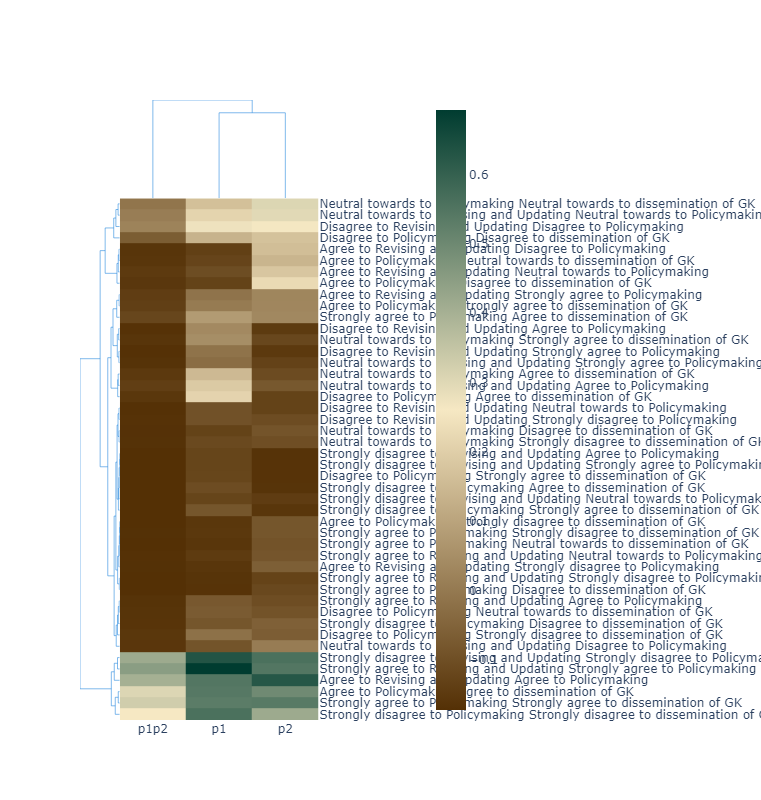

In [48]:
figx

In [49]:
figx.write_html("clustergram_likert.html") # save the plot to .html

# Assignment

Filter the final_df dataframe (the one we used to make the network plots) for joint probability greater than 10%. [1]

Plot the network, subsequently the sankey and cluster dendrogram of the data.

Finally, create a line plot with p1, p2, and p1p2. Optional: Make a vertical line on this plot that says top 10th percentile for p1p2.[2]

Hint [1]: Search for 'how to filter a dataframe by column values'
Hint [2]: https://plotly.com/python/line-charts/

Describe the obtained results in a few lines, and submit your plots as html files and jupyter notebook into your assignment folders for this session.

EON